___
# <font color=#00FF77> CMSE 830</font>
## <font color=#00FF88> HW #4</font>

____



### Name: Mikayla Norton

____
![kde](https://blogs.sas.com/content/iml/files/2016/07/kdecomponents1.png)

## Problem #1 (10pts):
### KDE and Rug Plots (from scratch!)

You are earning some extra money working in a restaurant while you complete your data science degree. In a conversation with other employees, the topic of tips comes up: do people tip 15% or 20%? An "argument" breaks out before you interrupt and point out that there is a distribution of tips, not a fixed value. In fact, you propose that the distribution of tips is normally distributed. To your surprise, you learn that one of the waitresses is also a data scientist student who points out that there is no reason to believe that the distribution of tips is normal and that the mean and standard deviation have any meaning. You propose to answer these questions by building a KDE of tip data!

✍🏻 For this problem, do **not** use a library to compute the KDE - do it yourself using basic Python. Your plot will be similar to the one above. Follow these steps:
* get the standard "tips" dataset (which is in Seaborn)
* compute the percentage tip from the data, and store those values in an array
* in `matplotlib`, plot a vertical line from 0 to 1 for each tip percentage (there are many ways to do this, but an easy way is to use [`vlines`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html)); you should have a vertical line marking each percentage tip in the dataset
* adjust the figure so that you can view the data well, perhaps using something like `plt.figure(figsize=(20,5))`
* from this plot, do you think that tips are normally distributed? why or why not?
* write a function called `my_kde` that reads in three variables: the _x_ values you want to plot over (perhaps use `linspace` over the range of percentage tip), the array of percent tips _p_ you computed above and the width _w_ of the kernel; make your kernel have the form $$K(x,p) = \exp(-(x - p)^2/2w^2)/(w\sqrt{2\pi})$$ and return the [sum of the kernels](https://en.wikipedia.org/wiki/Kernel_density_estimation) over all of the tip percentages (note that this will be an array over the _x_ values)
* plot your kde with the vertical lines you produced above - note that the vertical lines (if you made them from _0_ to _1_) will be a rug plot,
* make several plots with different values of the width _w_ (perhaps in the range _0.2_ to _6_); which value of _w_ is best?
* using NumPy, compute the mean and standard deviation of the percent tips, construct a normal distribution from those values and add that to your plot: this is the best normal distribution the data suggests and it many or may not look like the KDE (hint: `plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)))`)
* if you make your width _w_ too large, does the KDE predict anything impossible?
* finally, answer the question: do you think this is a normal distribution? Would you arrive at a different conclusion depending on which width _w_ you pick? What is your conclusion to the original conversation in the restaurant? Do you see outliers? (Put discussion in a markdown cell.)



_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._


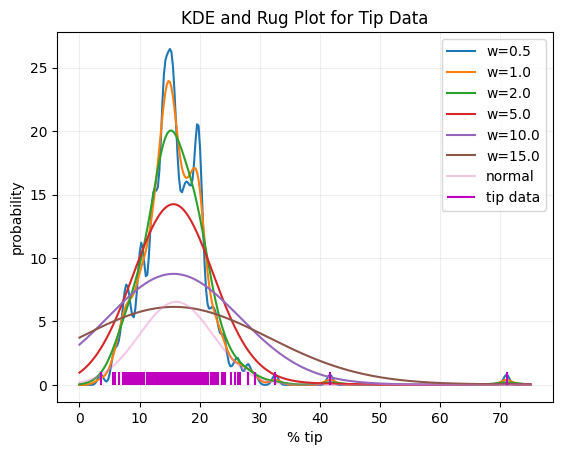

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")
pct_of_bill = list(df["tip"]/df["total_bill"]*100) # finding percent of bill that contributed to tips

def kde(pct, tips, width): # define function to take in range of tip percentages, actual data, and width to generate.
    kde = np.zeros(len(pct))
    for tip in tips:
        kde += np.exp(-(pct-tip)**2/(2*width**2))/(np.sqrt(2*np.pi)*width) #uses the function above to generate data: \exp(-(x - p)^2/2w^2)/(w\sqrt{2\pi})
    return kde

pct = np.linspace(0, 75, 300) #pct is the range of tip percentages being considered, the x values

plt.plot(pct, kde(pct, pct_of_bill, 0.5), label="w=0.5") #plot a range of KDE width options
plt.plot(pct, kde(pct, pct_of_bill, 1.0), label="w=1.0")
plt.plot(pct, kde(pct, pct_of_bill, 2.0), label="w=2.0")
plt.plot(pct, kde(pct, pct_of_bill, 5.0), label="w=5.0")
plt.plot(pct, kde(pct, pct_of_bill, 10.0), label="w=10.0")
plt.plot(pct, kde(pct, pct_of_bill, 15.0), label="w=15.0")
plt.plot(pct, 100*np.exp(-(pct - np.mean(pct_of_bill))**2/(2*np.var(pct_of_bill)))/(np.std(pct_of_bill)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='normal') # plot the normal curve of data

# rug plot
plt.vlines(pct_of_bill, 0, 1, 'm', label='tip data') # generate rug by hand

# create labels and plot features
plt.grid(alpha=0.2)
plt.title("KDE and Rug Plot for Tip Data")
plt.xlabel("% tip")
plt.ylabel("probability")
plt.legend()

🔆 <font color="pink"> I used a combo of my code with the solution below and commented as needed to explain steps. Most of the time, there is a bell curve shape to the lines, however at lower levels of width, there are two noticeable peaks at 15 and 20%. As the width grows, the curve smoothes, but eventually becomes flatter and wider. Past w=5.0, the curve begins to get much wider than the observed spread of data and doesn't make sense. </font>

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

df = sns.load_dataset("tips")
tip_perc = np.array(df["tip"]/df["total_bill"])*100


def my_kde(x_vals, tips, width):

  kde = np.zeros(len(x_vals))

  for tip in tips:

    kde += np.exp(-(x_vals - tip)**2/(2*width**2))/(np.sqrt(2*np.pi)*width)

  return kde

x_vals = np.linspace(0,75, 300)

plt.plot(x_vals, my_kde(x_vals, tip_perc, 0.5), label="w=0.5")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 1.0), label="w=1.0")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 2.0), label="w=2.0")
plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='normal')

# rug plot
plt.vlines(tip_perc, 0, 1, 'm', label='tip data')

plt.grid(alpha=0.2)
plt.title("KDE and Rug Plot for Tip Data")
plt.xlabel("% tip")
plt.ylabel("probability")
plt.legend()

____
![project](https://miro.medium.com/max/1400/1*xf7i-aJrlKahzzfiM7Pxfw.png)
## Problem #2 (10pts)

### <font color=#839383>_choosing a topic for your project_</font>

We are $\frac{1}{4}$ done with the semester, which means we are $\frac{1}{2}$ way to your midterm project.

Your project should contain many technical, coding and visualization details. But, what is much more important is that there is a story. This week we will work on the story.

Last week you examined several datasets that might be useful for your project. For this HW problem, you can use what you did last week; or, this is the time to choose different datasets if you didn't find last week's interesting or useful. After this week, you should decide on a dataset and stick with it at least through the midterm project.


✍🏻 In a markdown cell below, answer these questions:
* from a set of at least three datasets, discuss what they reveal to you,
* what is interesting about these datasets from a science point of view?,
* what is interesting about these datasets from a _data_ science point of view?
* you will create a web app in Streamlit, placed at GitHub: what would a web app do for each of the datasets?,
* you are not the user of your web app - you are creating it for someone you will never meet: what do you want them to get from the web app for each of these dataset?

Based on these steps, which of the datasets is the more interesting to you for your project and why?

The goal is for you to decide on a topic and know that it will be usable. Very often we have a project in mind for which there is no dataset available that allows us to do what we want. This is the time to ensure, through EDA on several datasets, that our project is realistic.

If you choose one of the more common and simple datasets, such as MPG, Penguin or Iris, you need to have a very compelling reason for your choice. There is already a lot known on the web about these datasets and there is very little new you can do with them. 

🔆 <font color="pink">Emissions by Country dataset:

This dataset interests me from a climate science perspective, as on personal values, I feel as though the climate change threats are one of the greatest dangers to humanity.

From a data science perspective, this dataset has a lot of data types to explore (categorical, georaphical, numerical, time series, etc).

This dataset provides a lot of creative uses for user interaction. I plan to use this dataset to display time series data of emissions most directly. For more interaction, the user will be able to filter various visualizations by country, or type of emission, or even display all emissions (from a category or total) for a given year. 

The EDA from HW 3 does not appear overly exciting without doing some much deeper pre-processing, but it clearly shows the data structure, trends in emissions, and that no category is clearly correlated with others. This data also spans multiple centuries and almost all countries, leaving a lot of room for exploration and storytelling. This dataset was disappointing in surface level EDA without diving in further, but the possibilities are extremely vast.

I want a person to be able to use this web app to visualize the time change in global or localized emissions and by type of emission, but also be able to visualize the largest contributors to the emissions crisis.
 </font>

🔆 <font color="pink">Mushroom dataset:

From the EDA, I realized just how bizarre this dataset was. This dataset was fully categorical. In the EDA, I had encoded the data to numerics to attempt to generate some correlative information, but those conclusions are less meaningful with categories. However, this data did have a card regarding the category names and meanings, as well as some of the common rules for detecting poisonous mushrooms. 

While I would not expect this dataset to be very useful for the midterm project, there could be some interesting ML work done with the rules provided. It would be interesting to create an interactive web app that allows a person to enter in observations about a mushroom they have and the model would predict if the mushroom is safe or poisonous.
</font>

🔆 <font color="pink">Spotify Streaming dataset:
For this last dataset, I was curious to see how it would compare with a previous Spotify project I have on my portfolio. However, the EDA indicates similar conclusions: song features hold minimal correlations to popularity. This dataset includes a lot of song feature information, but it would require a lot of exploration to determine how these ratings and values are assigned. It would be interesting to study how already successful artists compare to smaller artists. Also, the data for this set took some interesting workarounds to ensure the "streams" value was numeric. In addition, the KDE plots show most correlative distributions between streams with playlist presence or on the charts, both which would naturally be assumed as directly correlated. 

Despite my love for music, I did not see this dataset comparing with my previous project on insights, and would give up on it being a primary topic for the midterm this year. With that in mind, it could be an interesting final project idea to create recommendation systems based off similar music traits. For a web app, I envision a user inputing a song or playlist of songs they like, and the app would generate a list of similar recommedations based off characteristics, perhaps using a KNN structure.
</font>

____
![project](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)
## Problem #3 (5pts)

### <font color=#839383>more on Streamlit</font>

From the previous problem, choose your favorite dataset - the one you are liking to use for the midterm project. Build that into a very simple Streamlit app.

Do that by watching this video. Follow the video and build a web app as you are watching, but using the dataset you chose from the previous problem.

The goal is that you start to connect the narrative associated with the data to what the purpose of the web app might be.

If you are having any trouble with deploying Streamlit, please contact us on Slack.


In [31]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_Um12_OlGgw?si=pYR7WmeChe7Xxpq5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>


____
![impute](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/60128/versions/2/screenshot.jpg)
## Problem #4 (10pts)
### missingness and imputation

✍🏻 Open a markdown cell and answer these questions:
1. define "imputation" in your own words,
2. what is "listwise deletion" and what are two potential problems with using it?
3. how is "pairwise deletion" different from "listwise deletion", and what problems might it have?
4. define "missingness",
5. what are the three main types of missingness?
6. how is multiple imputation implemented?
7. what is mean substitution, and what can go wrong?
8. what is regression substitution, and what does it miss?
9. what problem does stochastic regression solve?
10. rank from best to worst: MAR, MCAR, MNAR


🔆 <font color="pink">imputation: replacement of missing values with other values (ex: mean imputation or median imputation).</font>

🔆 <font color="pink">listwise deletion: deletion of whole entries from a dataset based off missing values (whole rows). This could make deletions based on columns not in use. It could also over-condense the data.</font>

🔆 <font color="pink">pairwise deletion: deletion of values based on missing values from within one variable instead of row-wise. It can modify the lengths of each n and confuse data connections.</font>

🔆 <font color="pink">missingness: the pattern in which data are missing from the set.</font>

🔆 <font color="pink"> Types of Missingness: 
* Missing completely at random (MCAR)
* Missing at random (MAR)
* Missing not at random (MNAR)</font>

🔆 <font color="pink">Multiple imputation: By obtaining many predictions, the results can be pooled and give a confidence interval.</font>
🔆 <font color="pink">Mean imputation: replacing missing values with the mean value. Trends will be lost due to data skewed towards mean.</font>
🔆 <font color="pink">Regression substitution: Using the regression line to estimate values, but will lose noise in data.</font>
🔆 <font color="pink">Stochastic substitution: uses a regression model to predict data, estimate variance, and add noise to reduce skews from other methods of imputation.</font>

🔆 <font color="pink">
1. MCAR (best)
2. MAR
3. MNAR (worst)
</font>

___
![bvg](https://scipython.com/static/media/uploads/blog/multivariate_gaussian/bivariate_gaussian.png)

## Problem #5 (10pts)

### surface, image and contour plots


One of the most useful functions in data science is the Gaussian, which may be referred to as a "normal distribution". The Gaussian is central to the way we think about the mean and the standard deviation; and, because of its nice mathematical properties. Multivariate Gaussians appear in many data science models (e.g., machine learning models, such as Gaussian Process Regression).

Importantly for data science, we want to always use functions in an arbitrary number of dimensions.  For a Gaussian, we would refer to such a function as a multivariate Gaussian. We will cover the mathemtical details later in the semester. Today, we only wish to visualize a multivariate Gaussian to help us understand certain types of plots.

✍🏻 In `matplotlib` plot the Gaussian:
$$ p(x) = \frac{1}{w\sqrt{2\pi}}e^{-(x - μ)^2/2w^2}.$$
Plot this function for several values of $μ$ and $w$; in a markdown cell, comment on the meaning of these two parameters. Be sure your plot has a title along the lines of "Gaussian/Normal Distributions".


Text(0, 0.5, 'p(x)')

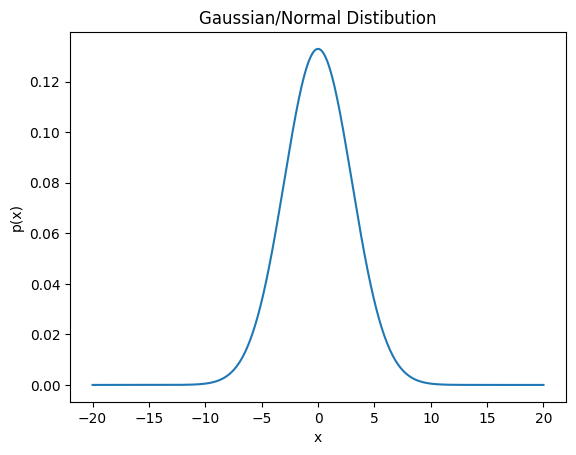

In [26]:
x = np.linspace(-20, 20, 500)


mu = 0 # mean
w = 3 # standard dev

p = 1/(w*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*w**2))

plt.plot(x,p)
plt.title("Gaussian/Normal Distibution")
plt.xlabel("x")
plt.ylabel("p(x)")

🔆 <font color="pink">By modifying the values of $\mu$ and $w$, it can be observed that $\mu$ represents the distribution mean, while $w$ represents one standard deviation of the distribution.</font>


✍🏻 Next, make similar plots in 2D using a multivariate Gaussian:
$$p(x,y) = \frac{1}{w_xw_y 2\pi }e^{-(x - \mu_x)^2/2w_x^2-(y - \mu_y)^2/2w_y^2}.$$
This is a type of "bivariate Gaussian", because it is in 2D. In a markdown cell, write what $w_x$, $w_y$, $\mu_x$ and $\mu_y$ are. That is, what aspects of the bivariate Gaussian do they control? Make three types of plots:
* surface plot,
* contour plot,
* image plot.

Use the same values in each so that you can compare these plots. The idea is that you learn how to interpret different types of visualizations that contain the same information.

Change the values of the parameters ($w_x$, $w_y$, $\mu_x$ and $\mu_y$) in several plots so that you can build your intuition for both bivariate Gaussians and what these three visualization types do.

_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._

Text(0.5, 0.92, '2D Gaussian/Normal Distribution')

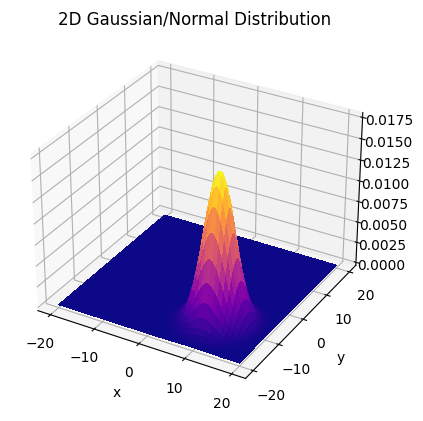

In [28]:
x = np.linspace(-20, 20, 500)
y = np.linspace(-20, 20, 500)
X, Y = np.meshgrid(x, y)


mx = 10 #mean x
my = -10 #mean y
wx = 3 #stdev x
wy = 3 #stdev y

Z = 1/(wx*wy*2*np.pi) *np.exp(-(X-mx)**2/(2*wx**2)-(Y-my)**2/(2*wy**2))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Gaussian/Normal Distribution - Surface Plot")

Text(0.5, 0.92, '2D Gaussian/Normal Distribution')

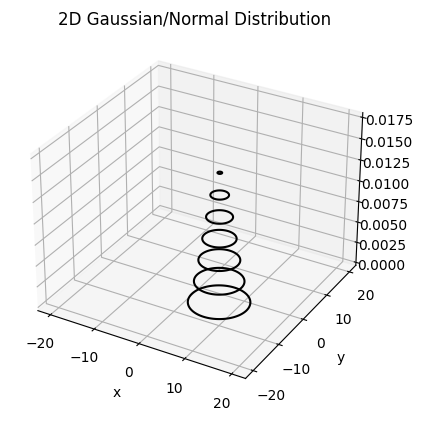

In [27]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.contour(X, Y, Z, colors='black')
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Gaussian/Normal Distribution - Contour Plot")

Text(0.5, 1.0, '2D Gaussian/Normal Distribution - Image Plot')

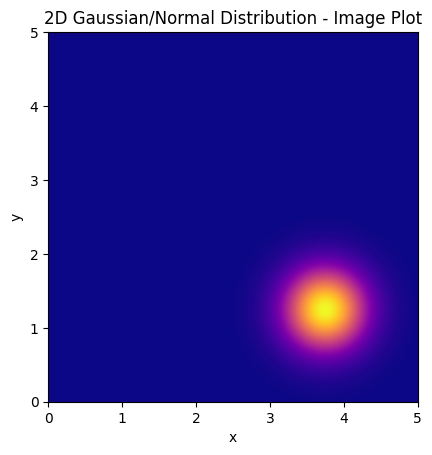

In [30]:
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='plasma');
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Gaussian/Normal Distribution - Image Plot")


🔆 <font color="pink">After varying the values of $w_x$, $w_y$, $\mu_x$ and $\mu_y$, I was able to conclude that both $\mu$ values represent the means of their respective subscripts, and both $w$ values represent the respective standard deviations.</font>

In [ ]:
# x = np.linspace(0, 5, 50)
# y = np.linspace(0, 5, 40)
# X, Y = np.meshgrid(x, y)

# mx = 2
# my = 3.5
# wx= 0.6
# wy= 0.6

# Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

In [ ]:
# plt.contour(X, Y, Z, colors='black')
# plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='plasma');

____
![box](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)
## Problem #6 (5pts)

### Violins and Boxes

✍🏻 Run the code below. In a markdown cell explain what the visualizations reveal to you. What story do you get? For example, why do you see the shapes that you see? How do you interpret these shapes? Do these two plots reveal the same information? Which one gives you more information?

For your projects, you will want to choose the best visualization that tells the story you wish to tell.

/Users/mnorton/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mnorton/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


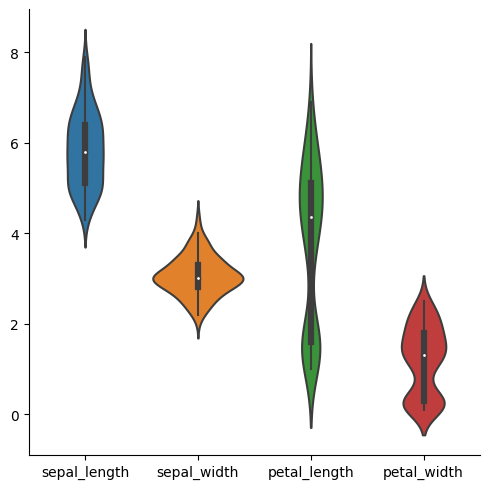

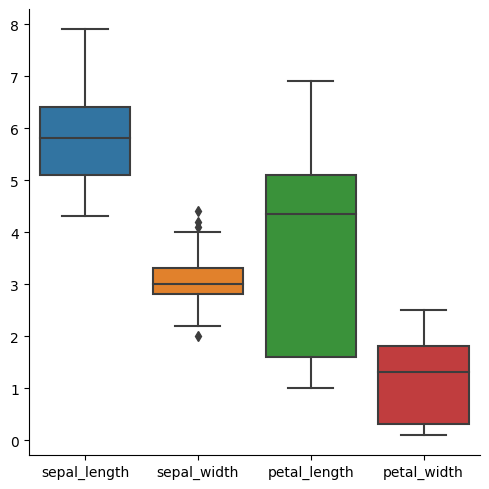

In [12]:
df_iris = sns.load_dataset("iris")

sns.catplot(data=df_iris, kind="violin")
sns.catplot(data=df_iris, kind="box")

🔆 <font color="pink">The violin plots demonstrate volume of spread in terms of distribution range and concentration. The box and whisker plots show less of the concentration, but still show distribution statistics (minimum, Q1, median, Q3, and maximum), IQR, and outliers.</font>

🔆 <font color="pink">From the violin plot: petal length and width have two peaks of concetration away from the center.</font>

🔆 <font color="pink"> From the box/whisker plot: sepal width holds the most outlier points and the smallest IQR, and petal length has the greatest IQR.</font>

🔆 <font color="pink">From both: petal length has the greatest range of spread, sepal width has the highest concentration of data around a given point.</font>